In [1]:
#import os, glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# `CVDP` output

In [2]:
base = '/work/mh1007/MPI-GE_processed/CVDP'

In [4]:
!cat /work/mh1007/MPI-GE_processed/CVDP/README

CVDP GE
-------

CVDP Website: http://www.cesm.ucar.edu/working_groups/CVC/cvdp/
CVDP Article: https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2014EO490002
Script used from: https://wiki.mpimet.mpg.de/doku.php?id=analysis:ruby:grand_ensemble:scripts&s[]=cvdp#cvdp_-_analysing_variability 
CVDP version: 0.3
Preprocessed script by: Sebastian Milinski
CVDP Analysis run by: Aaron Spring
Date: 2. June 2020
Script actually used to process a single experiment_type: cvdp_mpi-esm_0.3/cvdp_MPI-ESM.sh
Script actually used to process all: cvdp_mpi-esm_0.3/cvdp_MPI-ESM_run.sh

Analysis initially performned at path: /work/bm1124/m300524/CVDP_GE/cvdp_mpi-esm_0.3
Output initially at path: /work/bm1124/m300524/CVDP_GE/{experiment_type}

Experiment_type & available members processed:
- hist 1-100
- rcp26 1-100
- rcp45 1-100
- rcp85 1-100
- oncpct 1-100
- pictrl 1

Available output per experiment_type:
- .nc
  - for each ensemble member: hist/hist0001.cvdp_data.amo.1850-2005.nc
  - aggregated 100 

In [5]:
# experiments
exps = ['hist','rcp26','rcp45','rcp85','onepct']

In [6]:
# all those netcdf files are output from CVDP
!ls /work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.*.nc

/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.amo.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.pdo.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.pr.mean_stddev.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.pr.trends_timeseries.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.psl.mean_stddev.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.psl.nam_nao.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.psl.nam_nao.ts.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.psl.pna_npo.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.psl.pna_npo.ts.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.psl.sam_psa.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.psl.sam_psa.ts.1850-2005.nc
/work/mh1007/MPI-GE_processed/CVDP/hist/hist0001.cvdp_data.psl.sst.

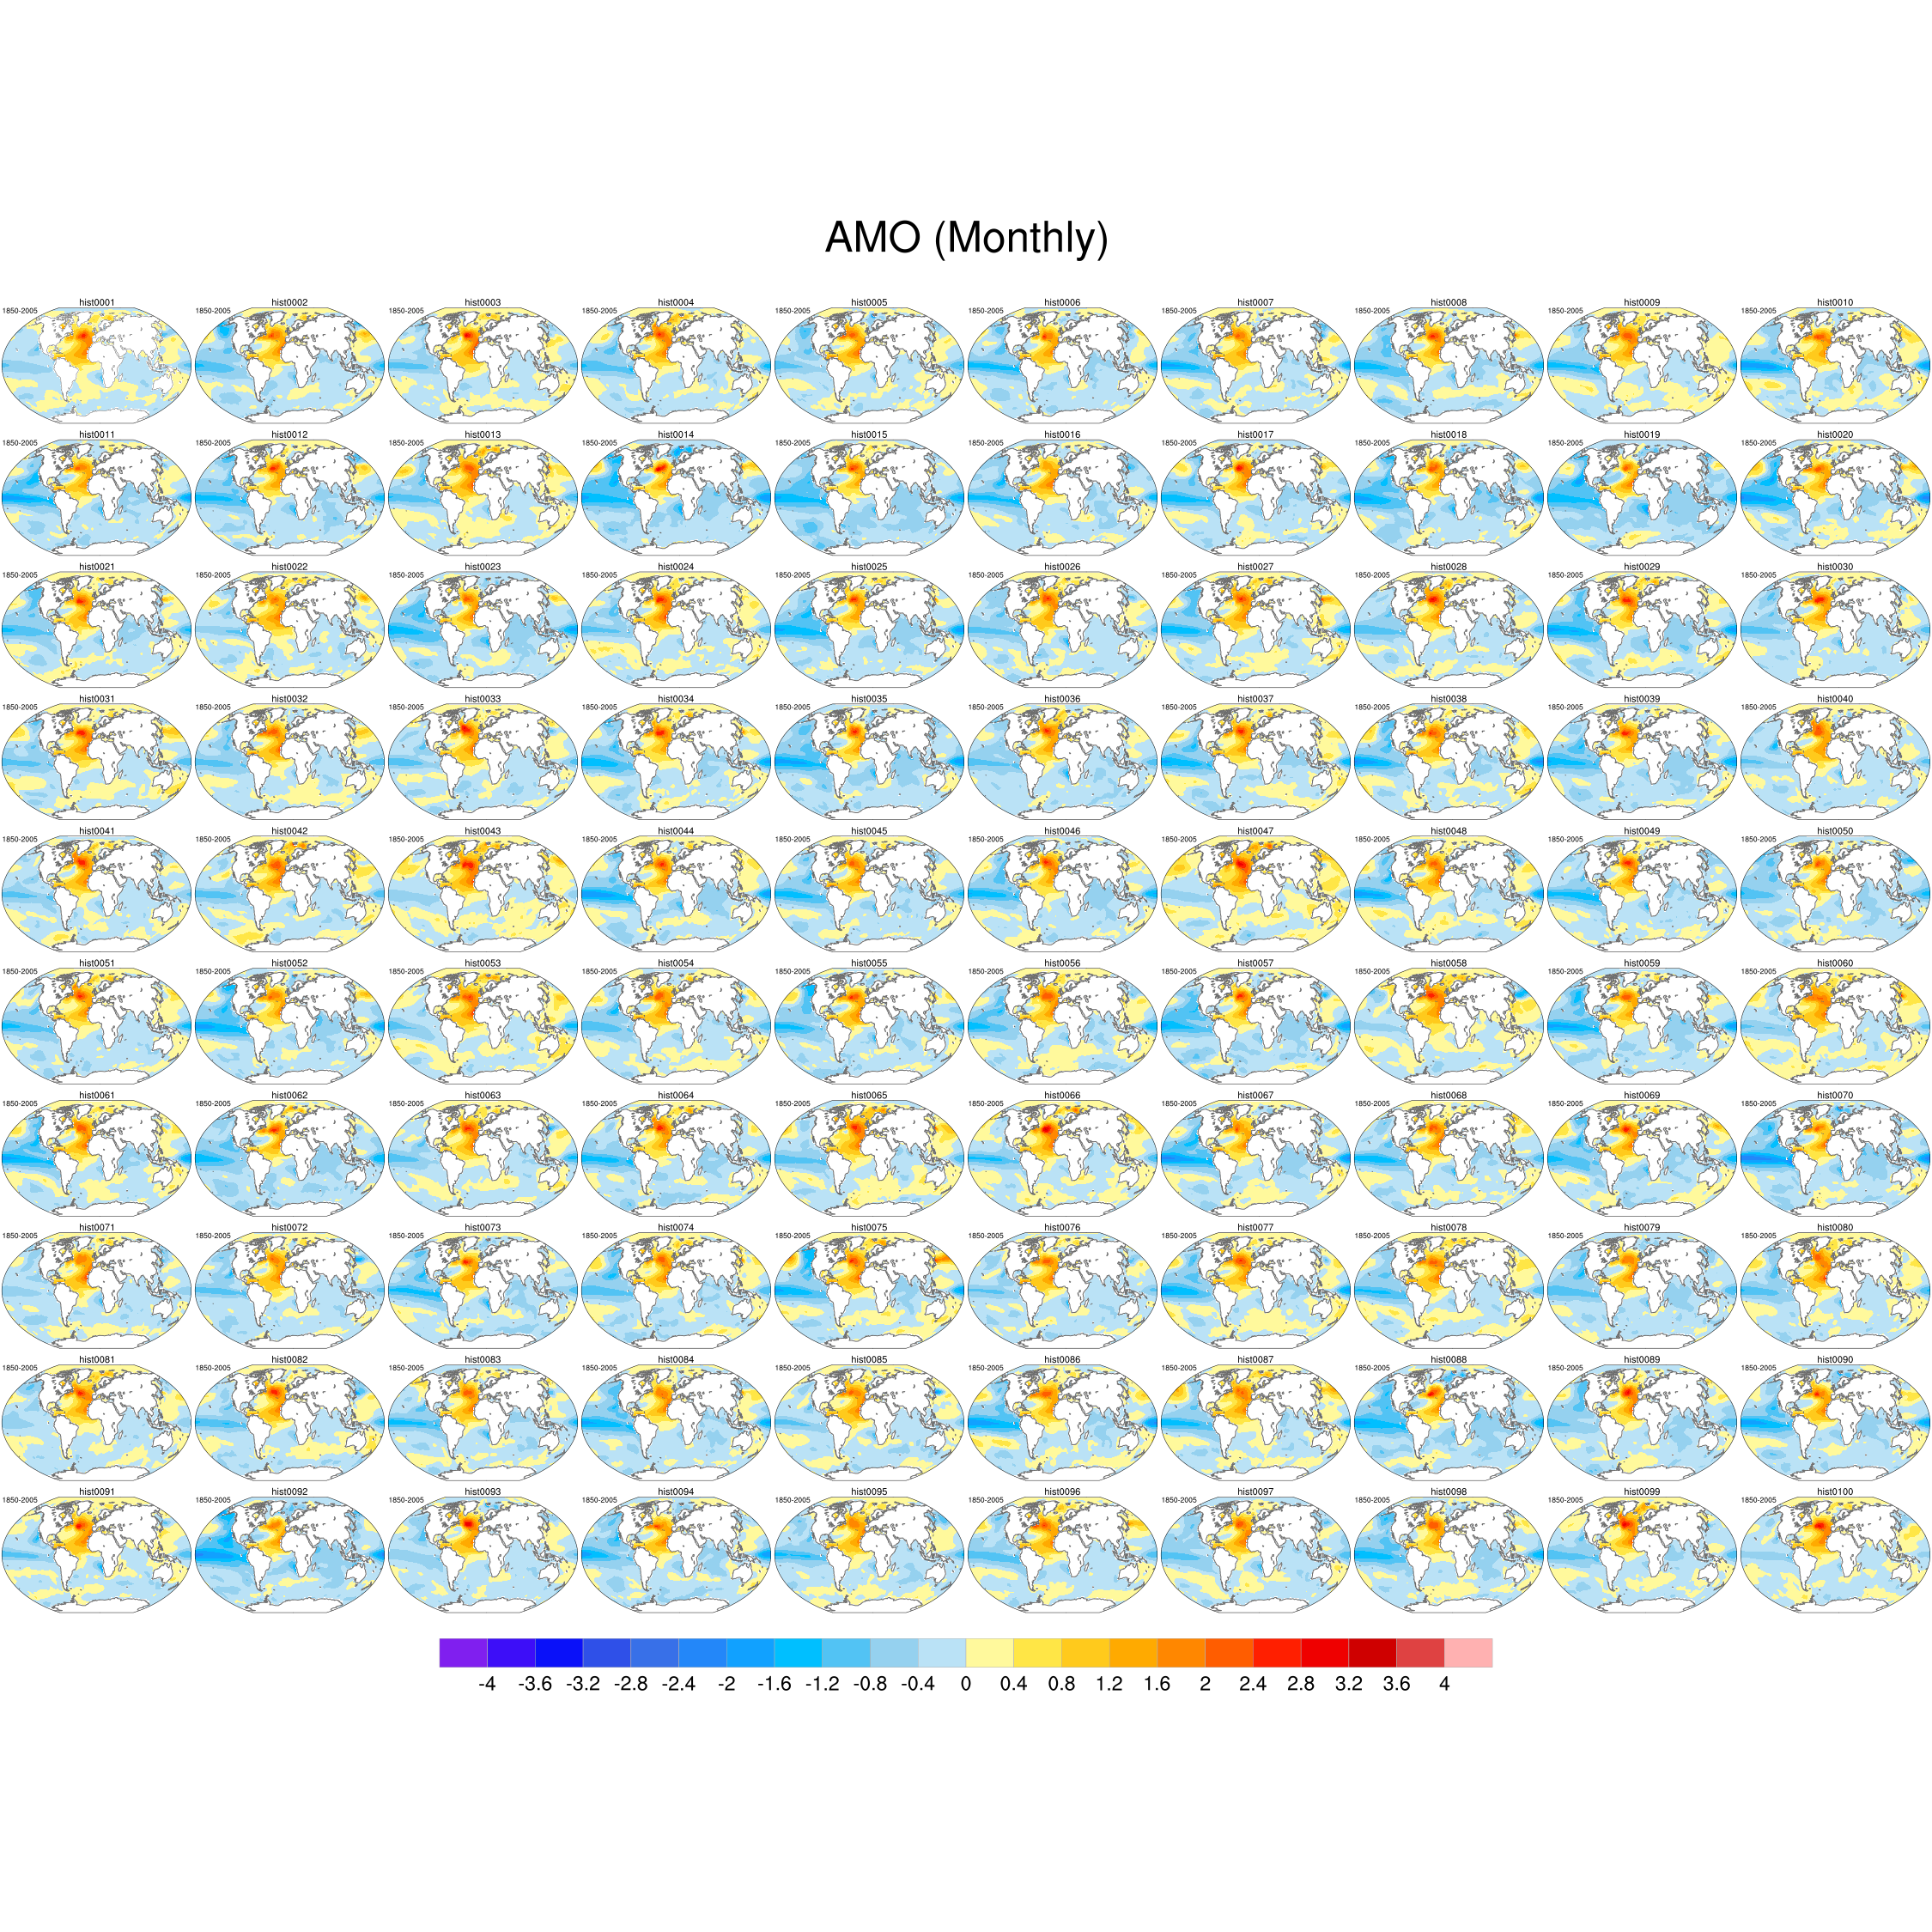

In [7]:
# also as png output
from IPython.display import Image
Image(filename='/work/mh1007/MPI-GE_processed/CVDP/hist/amo.png')

## SST-based indices

In [8]:
exp='hist'
index='sst.indices'

In [25]:
ds = xr.open_mfdataset(f'{base}/{exp}/{exp}.cvdp_data.{index}*.nc',decode_times=False)
print(ds)

<xarray.Dataset>
Dimensions:             (frequency: 936, lat: 96, lon: 192, member: 100, ncurves: 4, time: 1872)
Coordinates:
  * frequency           (frequency) float32 0.00053418806 0.0010683761 ... 0.5
  * time                (time) int64 0 28 59 89 120 ... 56855 56886 56916 56947
  * ncurves             (ncurves) int32 0 1 2 3
  * lon                 (lon) float32 -180.0 -178.125 -176.25 ... 176.25 178.125
  * lat                 (lat) float32 -88.57217 -86.722534 ... 88.57217
  * member              (member) int64 1 2 3 4 5 6 7 8 ... 94 95 96 97 98 99 100
Data variables:
    amo_pattern_mon     (member, lat, lon) float32 dask.array<chunksize=(100, 96, 192), meta=np.ndarray>
    amo_timeseries_mon  (member, time) float32 dask.array<chunksize=(100, 1872), meta=np.ndarray>
    amo_spectra         (member, ncurves, frequency) float32 dask.array<chunksize=(100, 4, 936), meta=np.ndarray>
Attributes:
    source:       NCAR Climate Analysis Section's Climate Variability Diagnos...
    no

In [11]:
# decode_cf only for this variable, clashes otherwise
i='nino34'
ds = xr.decode_cf(ds[[i]])[i]

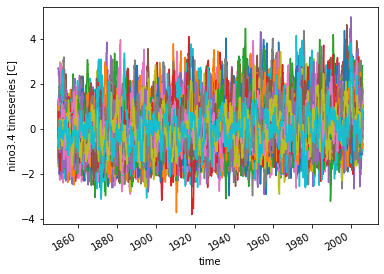

In [12]:
ds.plot(hue='member',add_legend=False)
plt.show()

Text(0.5, 1.0, 'nino34 standard deviation over time')

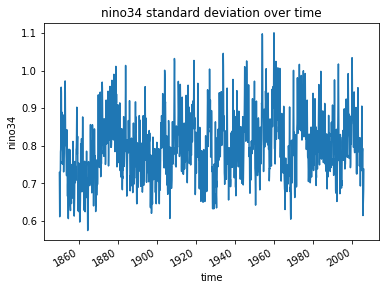

In [13]:
ds.std('member').plot()
plt.title(f'{i} standard deviation over time')

## AMO

In [14]:
index='amo'

In [26]:
ds = xr.open_mfdataset(f'{base}/{exp}/{exp}.cvdp_data.{index}*.nc')
print(ds)

<xarray.Dataset>
Dimensions:             (frequency: 936, lat: 96, lon: 192, member: 100, ncurves: 4, time: 1872)
Coordinates:
  * frequency           (frequency) float32 0.00053418806 0.0010683761 ... 0.5
  * time                (time) datetime64[ns] 1850-01-31 ... 2005-12-31
  * ncurves             (ncurves) int32 0 1 2 3
  * lon                 (lon) float32 -180.0 -178.125 -176.25 ... 176.25 178.125
  * lat                 (lat) float32 -88.57217 -86.722534 ... 88.57217
  * member              (member) int64 1 2 3 4 5 6 7 8 ... 94 95 96 97 98 99 100
Data variables:
    amo_pattern_mon     (member, lat, lon) float32 dask.array<chunksize=(100, 96, 192), meta=np.ndarray>
    amo_timeseries_mon  (member, time) float32 dask.array<chunksize=(100, 1872), meta=np.ndarray>
    amo_spectra         (member, ncurves, frequency) float32 dask.array<chunksize=(100, 4, 936), meta=np.ndarray>
Attributes:
    source:       NCAR Climate Analysis Section's Climate Variability Diagnos...
    notes:    

/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


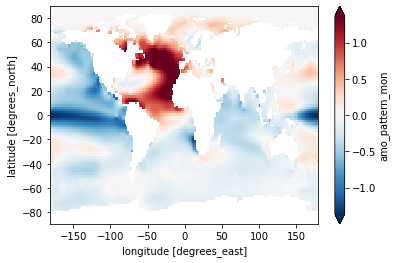

In [16]:
ds['amo_pattern_mon'].mean('member').plot(robust=True)

/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


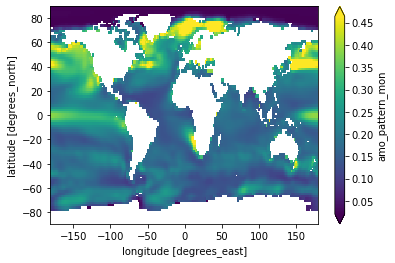

In [17]:
ds['amo_pattern_mon'].std('member').plot(robust=True)

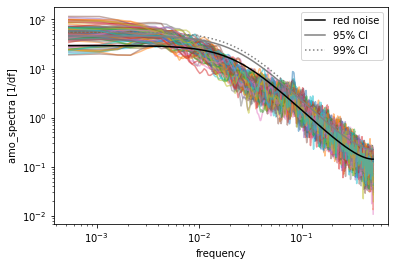

In [18]:
ds['amo_spectra'].sel(ncurves=0).plot(hue='member', add_legend=False, alpha=.5)
ds['amo_spectra'].sel(ncurves=1,member=1,drop=True).plot(c='k',label='red noise')
ds['amo_spectra'].sel(ncurves=2,member=1,drop=True).plot(c='gray', label='95% CI')
ds['amo_spectra'].sel(ncurves=3,member=1,drop=True).plot(c='gray', label='99% CI', ls=':')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

# Generate one `netcdf` file for all members

In [4]:
exp = exps[0]
member=1
mstr = str(member).zfill(4)
p = f'{base}/{exp}/{exp}{mstr}.*.nc'
#os.listdir(p)

In [5]:
filenames = !ls $p
filenames = [i.split('/')[6:][0] for i in filenames]
filenames = [i.strip('1850-2005.nc')[19:]
             for i in filenames]
filenames

['amo',
 'pdo',
 'pr.mean_stddev',
 'pr.trends_timeseries',
 'psl.mean_stddev',
 'psl.nam_nao',
 'psl.nam_nao.ts',
 'psl.pna_npo',
 'psl.pna_npo.ts',
 'psl.sam_psa',
 'psl.sam_psa.ts',
 'psl.sst.indices.tas',
 'psl.trends',
 'snd.mean_stddev',
 'snd.trends',
 'sst.indices',
 'sst.indices.ppt',
 'sst.indices.psl',
 'sst.mean_stddev',
 'sst.trends_timeseries',
 'tas.mean_stddev',
 'tas.trends_timeseries']

In [6]:
nfilespermember = len(glob.glob(p))
nfilespermember

22

In [7]:
import re
#'-'.join(re.findall(r'\d+','months in 1850-01-15 00'))

def set_time(ds):
    units = ds.time.attrs['units']
    start = '-'.join(re.findall(r'\d+',units)[:3])
    ds['time'] = xr.cftime_range(start=start, freq='M', periods=ds.time.size)
    return ds

In [8]:
members = np.arange(1,101)

In [9]:
exps

['hist', 'rcp26', 'rcp45', 'rcp85', 'onepct']

In [100]:
for filenamestr in filenames:
    print(filenamestr)
    for exp in exps:
        mstr = '*'
        if exp is 'hist':
            timestr='1850-2005'
        if exp in ['rcp26','rcp45','rcp85']:
            timestr='2006-2099'
        if exp is 'onepct':
            timestr='1850-1999'
        out_filename = f'{base}/{exp}/{exp}.cvdp_data.{filenamestr}.{timestr}.nc'
        if os.path.exists(out_filename):
            os.remove(out_filename)
        in_filename = f'{base}/{exp}/{exp}{mstr}.*.{filenamestr}.{timestr}.nc'
        #n = os.listdir(p)
        n = len(glob.glob(in_filename))
        expect = 100
        if n != expect:
            print(exp,member, timestr,in_filename, n,'!=',expect)

        dsm = xr.open_mfdataset(in_filename, decode_times=False, concat_dim='member', combine='nested')
        dsm['member']=np.arange(1,1+dsm.member.size)
        if 'time' in dsm.dims:
            dsm = set_time(dsm)
        print(f'save to {out_filename}')
        #display(dsm)
        dsm.to_netcdf(out_filename)

amo
save to /work/bm1124/m300524/CVDP_GE/hist/hist.cvdp_data.amo.1850-2005.nc
save to /work/bm1124/m300524/CVDP_GE/rcp26/rcp26.cvdp_data.amo.2006-2099.nc
save to /work/bm1124/m300524/CVDP_GE/rcp45/rcp45.cvdp_data.amo.2006-2099.nc
save to /work/bm1124/m300524/CVDP_GE/rcp85/rcp85.cvdp_data.amo.2006-2099.nc
save to /work/bm1124/m300524/CVDP_GE/onepct/onepct.cvdp_data.amo.1850-1999.nc
pdo
save to /work/bm1124/m300524/CVDP_GE/hist/hist.cvdp_data.pdo.1850-2005.nc
save to /work/bm1124/m300524/CVDP_GE/rcp26/rcp26.cvdp_data.pdo.2006-2099.nc
save to /work/bm1124/m300524/CVDP_GE/rcp45/rcp45.cvdp_data.pdo.2006-2099.nc
save to /work/bm1124/m300524/CVDP_GE/rcp85/rcp85.cvdp_data.pdo.2006-2099.nc
save to /work/bm1124/m300524/CVDP_GE/onepct/onepct.cvdp_data.pdo.1850-1999.nc
pr.mean_stddev
save to /work/bm1124/m300524/CVDP_GE/hist/hist.cvdp_data.pr.mean_stddev.1850-2005.nc
save to /work/bm1124/m300524/CVDP_GE/rcp26/rcp26.cvdp_data.pr.mean_stddev.2006-2099.nc
save to /work/bm1124/m300524/CVDP_GE/rcp45/rc

In [128]:
index='amo'
ds = xr.open_dataset(f'/work/bm1124/m300524/CVDP_GE/hist/hist.cvdp_data.{index}.1850-2005.nc')

ds

<xarray.Dataset>
Dimensions:             (frequency: 936, lat: 96, lon: 192, member: 100, ncurves: 4, time: 1872)
Coordinates:
  * frequency           (frequency) float32 0.00053418806 0.0010683761 ... 0.5
  * time                (time) datetime64[ns] 1850-01-31 ... 2005-12-31
  * ncurves             (ncurves) int32 0 1 2 3
  * lon                 (lon) float32 -180.0 -178.125 -176.25 ... 176.25 178.125
  * lat                 (lat) float32 -88.57217 -86.722534 ... 88.57217
  * member              (member) int64 1 2 3 4 5 6 7 8 ... 94 95 96 97 98 99 100
Data variables:
    amo_pattern_mon     (member, lat, lon) float32 ...
    amo_timeseries_mon  (member, time) float32 ...
    amo_spectra         (member, ncurves, frequency) float32 ...
Attributes:
    source:       NCAR Climate Analysis Section's Climate Variability Diagnos...
    notes:        Data from hist0001 from 1850-2005
    climatology:  1850-2005 climatology removed prior to all calculations (ot...

# monitoring

In [5]:
def clean(ds):
    for co in ['lon','lat','depth','depth_2','lev']:
        if co in ds.coords and co not in ds.dims:
            del ds[co]
    return ds

In [6]:
outpath='/work/mh1007/MPI-GE'
mon_path='/work/bm1124/m300524/GE_monitoring'
members=np.arange(1,101)
import dask

from distributed import Client, get_client
try:
    c = get_client()
    parallel=True
except ValueError:
    parallel=False

In [13]:
len(xr.cftime_range('1850',freq='YS',end='1999'))

150

In [19]:
ext

'rcp26'

In [14]:
%%time
for ext in exps[-1:]:
    if ext =='hist':
        start,end=1850,2005
    elif ext in ['rcp26','rcp45','rcp85']:
        start,end=2006,2099
    elif ext =='onepct':
        start,end=1850,1999
    time = xr.cftime_range(start=f"{start}", freq="YS",end=f'{end}')

    timestr='*'#'185*'

    ds_memberlist=[]
    for member in members:
        ds_modellist=[]
        for model in ["hamocc", "mpiom"]:
            expid=f'{ext}{str(member).zfill(4)}'
            in_filename = f'{outpath}/{ext}/{expid}/outdata/{model}/{expid}_{model}_monitoring_ym_{timestr}.nc'
            print(in_filename)
            ds = (
                xr.open_mfdataset(
                    in_filename,
                    decode_times=False,
                    concat_dim="time",
                    chunks={"time": -1},
                    parallel=parallel,
                    coords="minimal",
                    data_vars="minimal",
                    compat="override",
                    combine='nested'
                )
                .squeeze()
                .load()
            ).isel(time=slice(None,time.size))
            ds['time']=time
            ds_modellist.append(ds)
        ds_memberlist.append(xr.merge(ds_modellist, compat="override"))
    ds_mon = xr.concat(ds_memberlist, dim="member", coords='minimal', compat='override')
    ds_mon['member']=members
    ds_mon = clean(ds_mon)

    filename = f"{mon_path}/{ext}_mpiom_hamocc_monitoring.nc"
    print(dask.utils.format_bytes(ds_mon.nbytes), filename)
    ds_mon=ds_mon.compute()
    ds_mon.to_netcdf(filename)

/work/mh1007/MPI-GE/onepct/onepct0001/outdata/hamocc/onepct0001_hamocc_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0001/outdata/mpiom/onepct0001_mpiom_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0002/outdata/hamocc/onepct0002_hamocc_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0002/outdata/mpiom/onepct0002_mpiom_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0003/outdata/hamocc/onepct0003_hamocc_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0003/outdata/mpiom/onepct0003_mpiom_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0004/outdata/hamocc/onepct0004_hamocc_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0004/outdata/mpiom/onepct0004_mpiom_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0005/outdata/hamocc/onepct0005_hamocc_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0005/outdata/mpiom/onepct0005_mpiom_monitoring_ym_*.nc
/work/mh1007/MPI-GE/onepct/onepct0006/outdata/hamocc/onepct0006_hamocc_monitoring_ym_*.nc
/work/mh1007/MPI-GE/

In [13]:
#ds_mon['amoc26n'].plot(hue='member',x='time')

In [24]:
%%time
ext='pictrl'
expid='pictrl0001'
ds_modellist=[]
timestr='*'
start,end=1850,3850
time = xr.cftime_range(start=f"{start}", freq="YS",end=f'{end}')
for model in ["hamocc", "mpiom"]:
    in_filename = f'{outpath}/{ext}/{expid}/outdata/{model}/{expid}_{model}_monitoring_ym_{timestr}.nc'
    print(in_filename)
    ds = (
        xr.open_mfdataset(
            in_filename,
            decode_times=False,
            concat_dim="time",
            chunks={"time": 'auto'},
            parallel=parallel,
            coords="minimal",
            data_vars="minimal",
            compat="override",
            combine='nested'
        )
        .squeeze()
        .load()
    )
    ds['time']=time
    ds_modellist.append(ds)
ds_mon = xr.merge(ds_modellist, compat="override")
ds_mon = clean(ds_mon)
filename = f"{mon_path}/{ext}_mpiom_hamocc_monitoring.nc"
print(dask.utils.format_bytes(ds_mon.nbytes), filename)
ds_mon=ds_mon.compute()
ds_mon.to_netcdf(filename)

/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/hamocc/pictrl0001_hamocc_monitoring_ym_*.nc
/work/mh1007/MPI-GE/pictrl/pictrl0001/outdata/mpiom/pictrl0001_mpiom_monitoring_ym_*.nc
304.15 kB /work/bm1124/m300524/GE_monitoring/pictrl_mpiom_hamocc_monitoring.nc
CPU times: user 6min 3s, sys: 2min 45s, total: 8min 49s
Wall time: 12min 21s
